# PREDICTING CAR PRICES

I have a data set which has information about cars from different brands. Also, the data set has the technical aspects of the cars which is effective to determine the price of the cars. You can reach more information about data on this [website]("https://archive.ics.uci.edu/ml/datasets/automobile"). I will use the data set to predict cars' prices. I am planning to use k-nearest neighbors algorithm in this project. I will start with exploring data.  

### Opening Data

In [1]:
import pandas as pd
import numpy as np

In [2]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Preparing the Data to Predict

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

I don't have any null value in the data set. However, there are some missing values that are showed as '?'. I have to convert these missing values for more useful data set to predict.

In [5]:
# I select only continous columns from-- https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                          'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars= cars[continuous_values_cols]



In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   bore               205 non-null    object 
 7   stroke             205 non-null    object 
 8   compression-rate   205 non-null    float64
 9   horsepower         205 non-null    object 
 10  peak-rpm           205 non-null    object 
 11  city-mpg           205 non-null    int64  
 12  highway-mpg        205 non-null    int64  
 13  price              205 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


I need to change '?' values as null value to clean this data. After I change the '?' value with null values, I will develop strategies for each column to fill null values. 

In [8]:
numeric_cars= numeric_cars.replace('?', np.nan)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   bore               201 non-null    object 
 7   stroke             201 non-null    object 
 8   compression-rate   205 non-null    float64
 9   horsepower         203 non-null    object 
 10  peak-rpm           203 non-null    object 
 11  city-mpg           205 non-null    int64  
 12  highway-mpg        205 non-null    int64  
 13  price              201 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [9]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Most of the null values are in 'normalized-losses' column.

In [10]:
numeric_cars= numeric_cars.astype('float') # To make the dataset as numeric.

In [11]:
# I will drop the null values from 'price' column, because we want to predict the price for a car.
numeric_cars= numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
# I will replace the other null values with the mean of the columns.
numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   bore               201 non-null    float64
 7   stroke             201 non-null    float64
 8   compression-rate   201 non-null    float64
 9   horsepower         201 non-null    float64
 10  peak-rpm           201 non-null    float64
 11  city-mpg           201 non-null    float64
 12  highway-mpg        201 non-null    float64
 13  price              201 non-null    float64
dtypes: float64(14)
memory usage: 23.6 KB


Now, I have 201 cars to use on my prediction with non-null values.

In [14]:
# I normalize the columns to make their range from 0 to 1.
price= numeric_cars['price']
numeric_cars= (numeric_cars - numeric_cars.min())/(numeric_cars.max()- numeric_cars.min())
numeric_cars['price']= price


In [15]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Modelling

Let's start our prediction process. At first, I will start with a simple model before move to more complex modelling. I try to see the RMSE values to understand my prediction's success.

### Univariate Model

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# We starts with a first knn prediction function
def knn_train_test(train_col, target_col, df):
    knn= KNeighborsRegressor()
    np.random.seed(1)
    
    #To rondomize order of rows.
    shuffled_index= np.random.permutation(df.index)
    rand_df= df.reindex(shuffled_index)
    
    #To divide number of rows in half and round.
    last_train_row= int(len(rand_df)/2)
    
    #To select training and test datasets.
    train_df= rand_df.iloc[0:last_train_row]
    test_df= rand_df.iloc[last_train_row:]
    
    #To fit a KNN model.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #To make prediction with KNN model.
    predicted_labels= knn.predict(test_df[[train_col]])
    
    #To calculate and return RMSE value.
    mse= mean_squared_error(test_df[target_col], predicted_labels)
    rmse=np.sqrt(mse)
    return rmse


I have a function to see the RMSE value for KNN model's prediction. Let's use it for data set. 

In [17]:
rmse_results={}
train_cols= numeric_cars.columns.drop('price') #I do not need the 'price', because we try to predict 'price' values.


for col in train_cols:
    rmse_val= knn_train_test(col, 'price', numeric_cars)
    rmse_results[col]= rmse_val
    
rmse_results


{'normalized-losses': 7330.197653434445,
 'wheel-base': 5461.553997873057,
 'length': 5427.2009608367125,
 'width': 4704.482589704386,
 'height': 8144.441042663747,
 'curb-weight': 4401.118254793124,
 'bore': 6780.627784685976,
 'stroke': 8006.529544647101,
 'compression-rate': 6610.812153159129,
 'horsepower': 4037.0377131537603,
 'peak-rpm': 7697.4596964334805,
 'city-mpg': 4766.422505090134,
 'highway-mpg': 4630.026798588056}

In [18]:
rmse_results_series= pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

It looks successful for first step. I will implement my model bu using different k values. 

In [19]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index= np.random.permutation(df.index)
    rand_df= df.reindex(shuffled_index)
    
    last_train_row= int(len(rand_df)/2)
    
    train_df= rand_df.iloc[0:last_train_row]
    test_df= rand_df.iloc[last_train_row:]
    
    k_values= [1,3,5,7,9]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        predicted_labels= knn.predict(test_df[[train_col]])
        
        mse= mean_squared_error(test_df[target_col],predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]= rmse
        
    return k_rmses


    

In [20]:
k_rmse_results={}
train_cols= numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val= knn_train_test(col,'price',numeric_cars)
    k_rmse_results[col]= rmse_val
    
k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

I used 5 different k values which are 1, 3, 5, 7 and 9. I will plot the RMSE values for each k value.

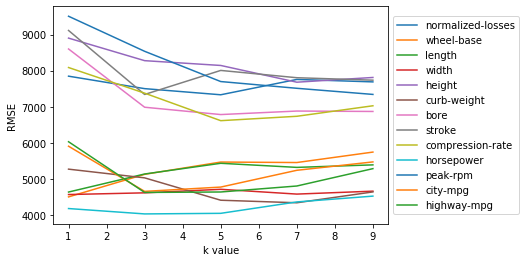

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    legend= k_rmse_results.keys()
    x= list(v.keys())
    y= list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
#The average RMSE of each features for different 'k' values.
feature_avg_rmse={}

for k,v in k_rmse_results.items():
    avg_rmse= np.mean(list(v.values()))
    feature_avg_rmse[k]= avg_rmse
    
series_avg_rmse= pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In the last step, I calculated the average RMSE values for each column. In the next step, I will implement my model to make prediction on multiple columns.

### Multivariate Model

I keep going on improving my model to use it more than one columns. At first, I will try the model while setting the k value as 5. After that, I will create features which have multiple columns and I will make prediction on the features.

In [23]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index= np.random.permutation(df.index)
    rand_df= df.reindex(shuffled_index)
    
    last_train_row= int(len(rand_df)/2)
    
    train_df= rand_df.iloc[0:last_train_row]
    test_df= rand_df.iloc[last_train_row:]
    
    k_values=[5]
    k_rmses={}
    
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        predicted_labels= knn.predict(test_df[train_cols])
        
        mse= mean_squared_error(test_df[target_col], predicted_labels)
        rmse= np.sqrt(mse)
        
        k_rmses[k]= rmse
        
    return k_rmses



I have developed the function that gives the RMSE values for k=5. I will try to use the function on features more than one. I will see the results.

In [24]:
k_rmse_results={}

two_best_features= ['horsepower', 'width']
rmse_val= knn_train_test(two_best_features, 'price',numeric_cars )
k_rmse_results['two_best_features']= rmse_val

three_best_features= ['horsepower', 'width', 'curb-weight']
rmse_val= knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three_best_features']= rmse_val

four_best_features=['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val= knn_train_test(four_best_features,'price', numeric_cars)
k_rmse_results['four_best_features']= rmse_val

five_best_features= ['horsepower', 'width', 'curb-weight', 'city-mpg','highway-mpg' ]
rmse_val= knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five_best_features']= rmse_val

six_best_features= ['horsepower', 'width', 'curb-weight', 'city-mpg','highway-mpg','length' ]
rmse_val= knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six_best_features']= rmse_val

k_rmse_results

{'two_best_features': {5: 3589.3132622073304},
 'three_best_features': {5: 3305.9401397969677},
 'four_best_features': {5: 3280.3807311630976},
 'five_best_features': {5: 3341.6024539726504},
 'six_best_features': {5: 3628.261188214127}}

You can see the RMSE values above. Let's create another function which gives RMSE values on those features for k that range is from 1 to 25.

In [25]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index= np.random.permutation(df.index)
    rand_df= df.reindex(shuffled_index)
    
    last_train_row= int(len(rand_df)/2)
    
    train_df= rand_df.iloc[0:last_train_row]
    test_df= rand_df.iloc[last_train_row:]
    
    k_values= [i for i in range(1,25)]
    k_rmses={}
    
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        predicted_labels= knn.predict(test_df[train_cols])
        
        mse= mean_squared_error(test_df[target_col], predicted_labels)
        rmse= np.sqrt(mse)
        
        k_rmses[k]= rmse
        
    return k_rmses



Let's use my function for 3,4 and 5 features.

In [26]:
k_rmse_results={}

three_best_features= ['horsepower', 'width', 'curb-weight']
rmse_val= knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three_best_features']= rmse_val

four_best_features= ['horsepower', 'width', 'curb-weight','city-mpg']
rmse_val= knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four_best_features']= rmse_val

five_best_features=['horsepower', 'width', 'curb-weight','city-mpg','highway-mpg']
rmse_val= knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five_best_features']= rmse_val


k_rmse_results

{'three_best_features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 'four_best_features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 4444.1

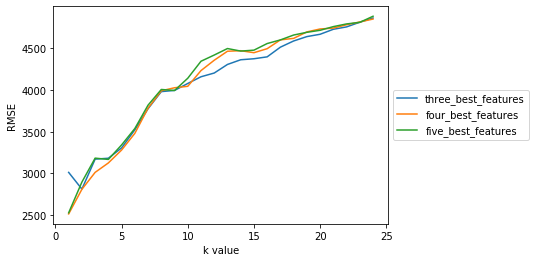

In [27]:
#To plot my values

for k,v in k_rmse_results.items():
    legend= k_rmse_results.keys()
    x= list(v.keys())
    y= list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(legend,loc='center left', bbox_to_anchor=(1, 0.5))

# Summary

I implemented my prediction model step by step. I started with calculating the RMSE value on each column without setting k value. I implemented my train and test function by setting the k value as 1,3,5,7 and 9. I created a plot that shows the RMSE values for each k value. After that, I kept up developing my model while changing the k values and creating new features. I trained and tested the RMSE values again. Finally, I got a graphic that shows the RMSE values for k values(from 1 to 25). The RMSE value increases as k value increases, in the graphic, for each group of features. 